In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("proccesed_sentiment_keywords.csv",index_col=0)

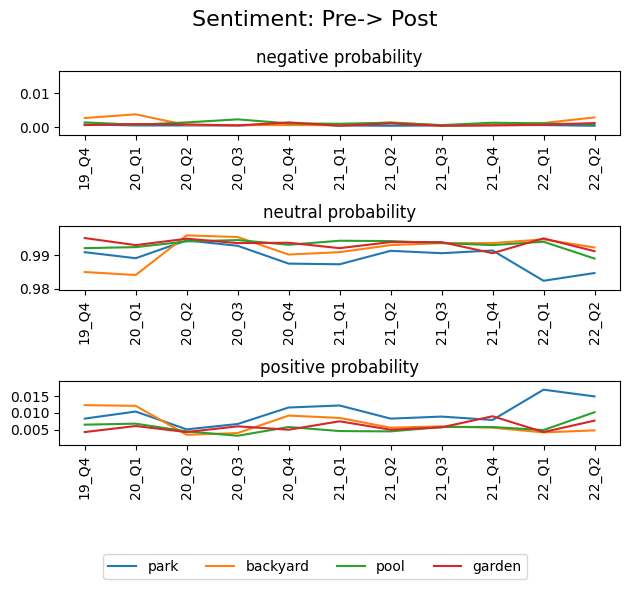

In [4]:
quarter_list = ['19_Q4', "20_Q1","20_Q2","20_Q3","20_Q4","21_Q1","21_Q2","21_Q3","21_Q4","22_Q1","22_Q2","22_Q3","22_Q4"]
def sentiment_plotter(keywords, full = True, fig_title = 'Sentiment'):
    fig, axes = plt.subplots(3,1)
    neg_ax = axes[0]
    neu_ax = axes[1]
    pos_ax = axes[2]

    legend_list = []

    min_neg = 1
    min_neu = 1
    min_pos = 1
    max_diff = 0
    if len(keywords) > 0: 
        iter_df = df[df.keyword.str.contains("|".join(keywords))]
    else:
        iter_df = df
    for sub_split in iter_df.iterrows():
        legend_list.append(sub_split[1]["keyword"])
        neg_list = []
        neu_list = []
        pos_list = []
        for idx in range(len(sub_split[1][1:12])):
            neg,neu,pos = sub_split[1][1:12][idx].split(" ")

            if full == 'full' or full =='timelm':
                neg_list.append(float(neg))
                neu_list.append(float(neu))
                pos_list.append(float(pos))

        if not full == 'timelm':
            # post
            neg,neu,pos = sub_split[1][13].split(" ")
            neg_list.append(float(neg))
            neu_list.append(float(neu))
            pos_list.append(float(pos))

            # pre
            neg,neu,pos = sub_split[1][12].split(" ")

            neg_list = [float(neg)]+neg_list
            neu_list = [float(neu)]+neu_list
            pos_list = [float(pos)]+pos_list
        
        if (temp_min:=min(neg_list)) < min_neg:
            min_neg = temp_min
        diff = max(neg_list)-min_neg
        if diff > max_diff:
            max_diff = diff

        if (temp_min:=min(neu_list)) < min_neu:
            min_neu = temp_min
        diff = max(neu_list)-min_neu
        if diff > max_diff:
            max_diff = diff

        if (temp_min:=min(pos_list)) < min_pos:
            min_pos = temp_min
        diff = max(pos_list)-min_pos
        if diff > max_diff:
            max_diff = diff


        # for list in [neg_list,neu_list, pos_list]:



        # max_bound = max(neg_list + neu_list + pos_list)
        # low_bound = min(neg_list + neu_list + pos_list)

        neg_ax.plot(neg_list)
        neu_ax.plot(neu_list)
        pos_ax.plot(pos_list)

    if full == 'full': 
        neg_ax.set_xticks(range(0,13),['pre']+[quarter_list[nr] for nr in range(0,11)]+['post'],rotation=90)
        neu_ax.set_xticks(range(0,13),['pre']+[quarter_list[nr] for nr in range(0,11)]+['post'],rotation=90)
        pos_ax.set_xticks(range(0,13),['pre']+[quarter_list[nr] for nr in range(0,11)]+['post'],rotation=90)
    elif full == 'timelm':
        neg_ax.set_xticks(range(0,11),[quarter_list[nr] for nr in range(0,11)],rotation=90)
        neu_ax.set_xticks(range(0,11),[quarter_list[nr] for nr in range(0,11)],rotation=90)
        pos_ax.set_xticks(range(0,11),[quarter_list[nr] for nr in range(0,11)],rotation=90)
    else:
        neg_ax.set_xticks([0,1],['pre', 'post'])
        neu_ax.set_xticks([0,1],['pre', 'post'])
        pos_ax.set_xticks([0,1],['pre', 'post'])

    # print(max_diff)
    # print(min_neu)
    neg_ax.set_ylim([min_neg-max_diff*0.2,min_neg+max_diff+max_diff*0.2])
    neu_ax.set_ylim([min_neu-max_diff*0.2,min_neu+max_diff+max_diff*0.2])
    pos_ax.set_ylim([min_pos-max_diff*0.2,min_pos+max_diff+max_diff*0.2])

    neg_ax.set_title("negative probability")
    neu_ax.set_title("neutral probability")
    pos_ax.set_title("positive probability")
    fig.legend(legend_list,loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
    fig.tight_layout()
    fig.suptitle(fig_title, y=1.05, fontsize=16)
    
    return 
sentiment_plotter(keywords = ['park','garden','pool','backyard'],full='timelm', fig_title= "Sentiment: Pre-> Post")

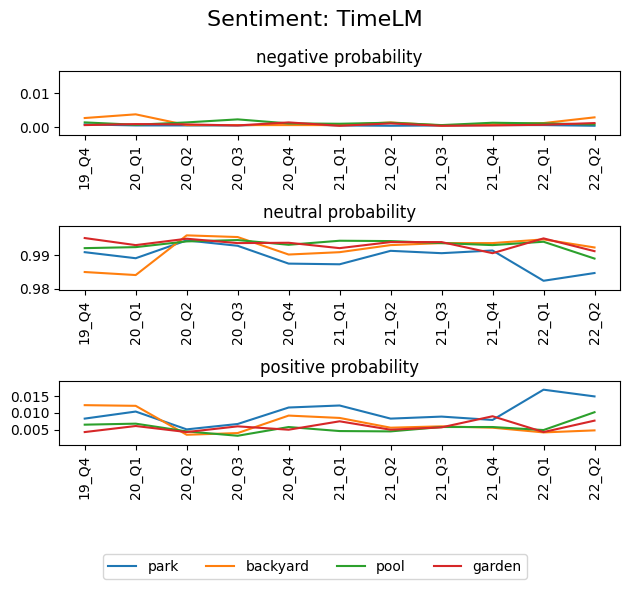

In [49]:
sentiment_plotter(keywords = ['park', 'garden','pool','backyard'],full=False, fig_title= "Sentiment: TimeLM")

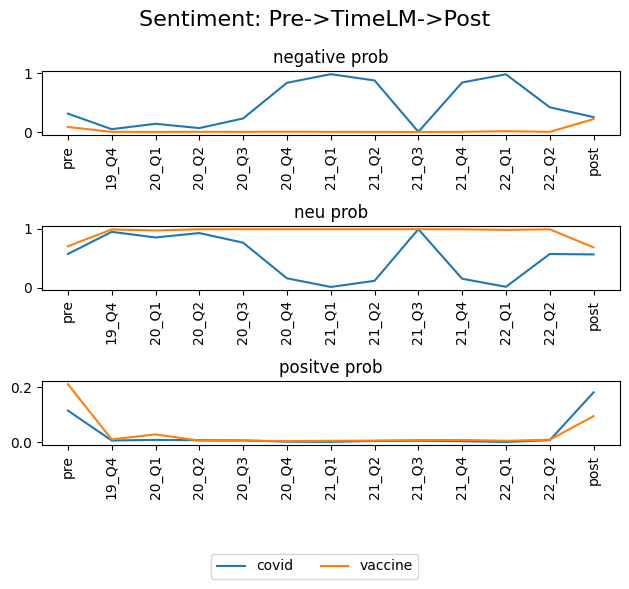

In [236]:
sentiment_plotter(['vaccine','covid'],full=True, fig_title="Sentiment: Pre->TimeLM->Post")

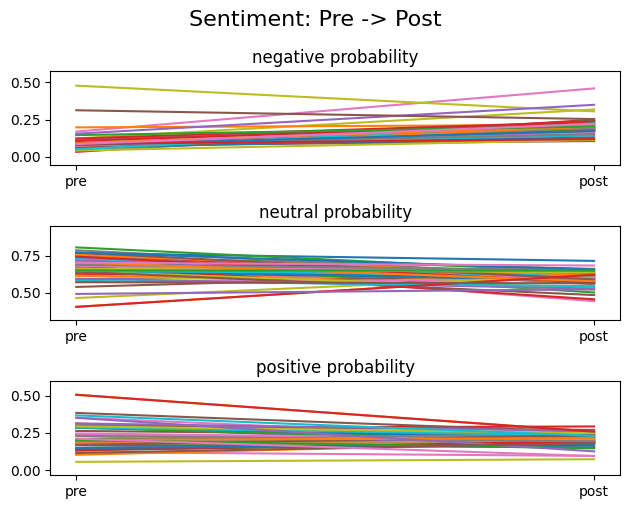

In [83]:
sentiment_plotter(keywords = [],full='an', fig_title= "Sentiment: Pre -> Post")

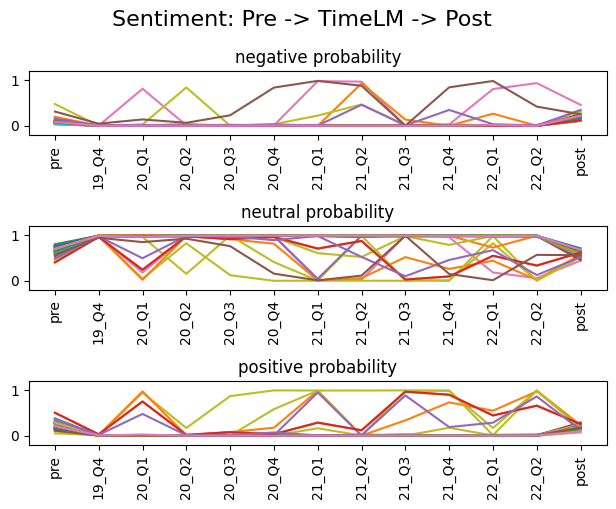

In [86]:
sentiment_plotter(keywords = [],full='full', fig_title= "Sentiment: Pre -> TimeLM -> Post")

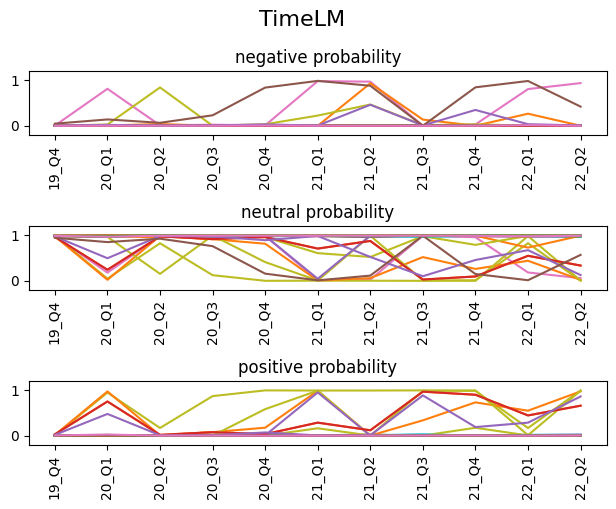

In [88]:
sentiment_plotter(keywords = [],full='timelm', fig_title= "TimeLM")